In [25]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages

# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [42]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)



Data dimensions: (506, 13)



Histogram of the Prelim Model Data of Boston DataFrame:


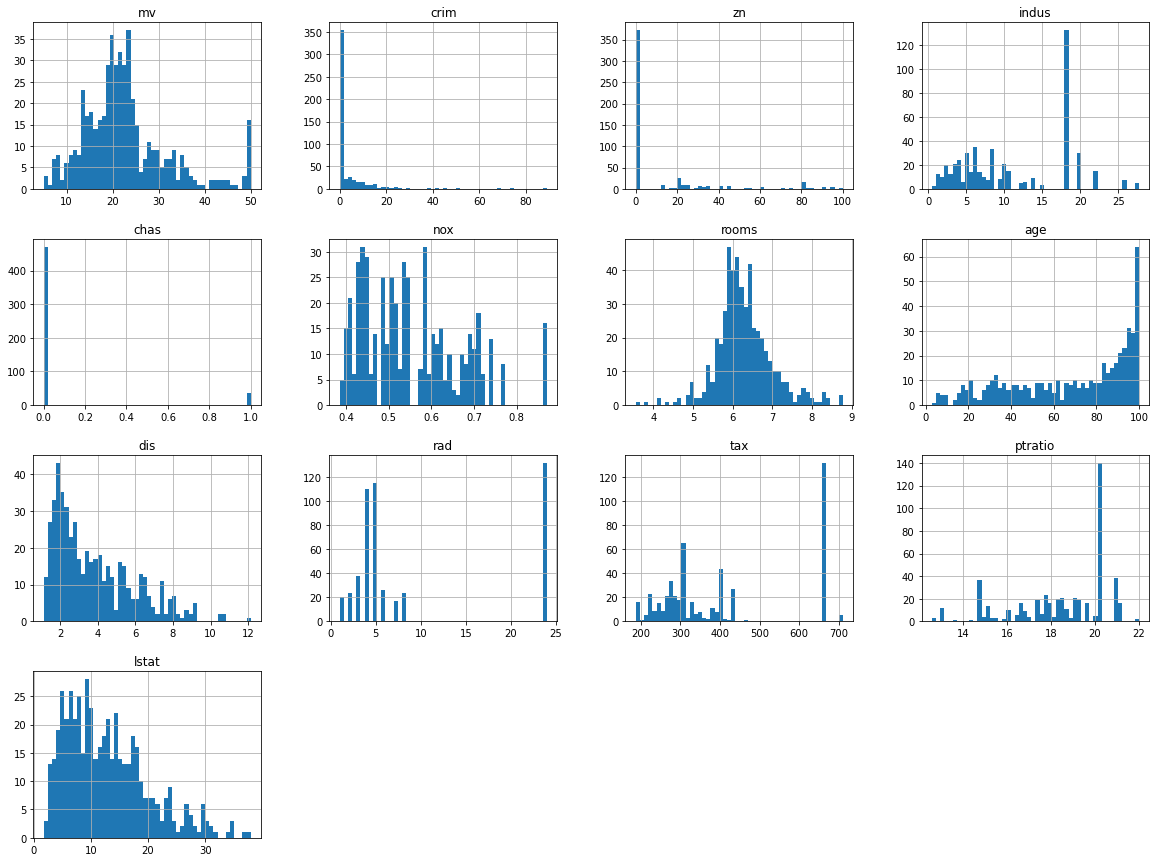

In [43]:
# histogram of prelim data
print('\nHistogram of the Prelim Model Data of Boston DataFrame:')
import matplotlib.pyplot as plt
boston_prelim=pd.DataFrame(prelim_model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_prelim.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)

StandardScaler()
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)



Histogram of the Scaled Model Data of Boston DataFrame:


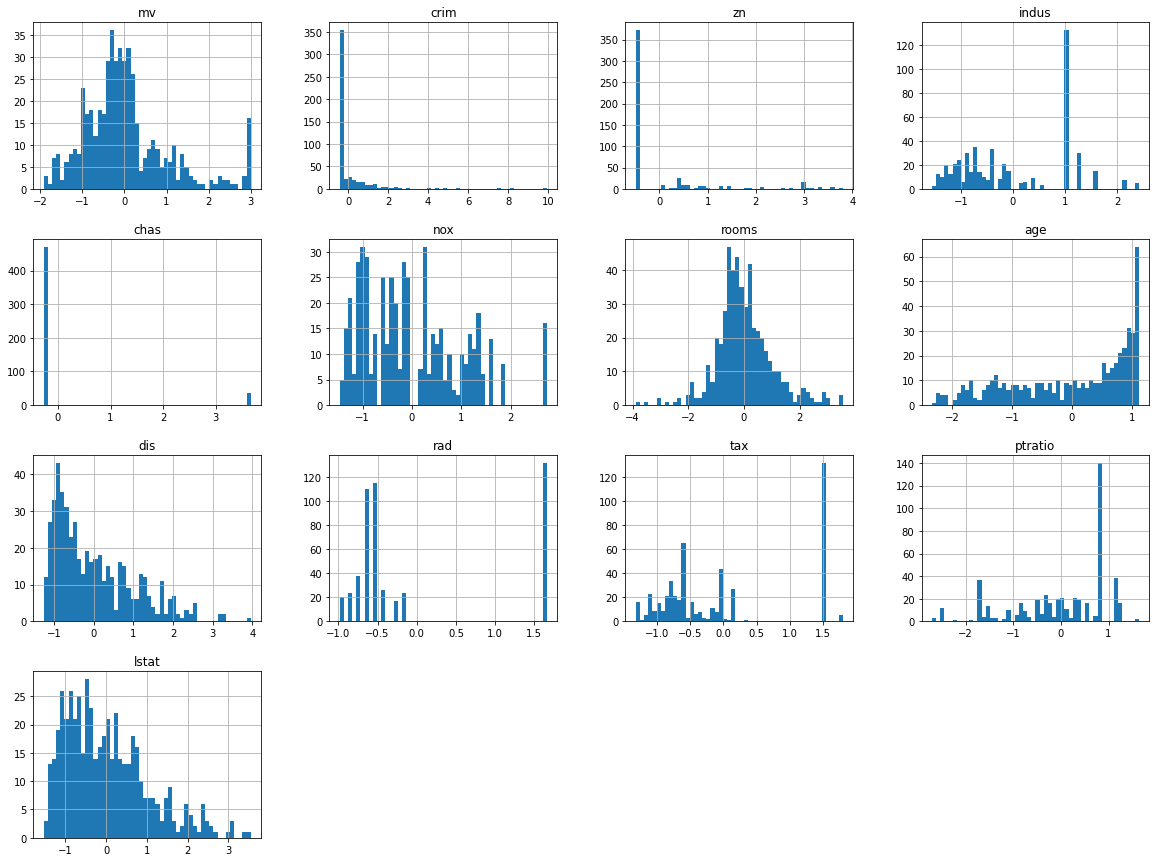

In [45]:
# histogram of scaled model data
print('\nHistogram of the Scaled Model Data of Boston DataFrame:')
boston_scaled=pd.DataFrame(model_data,columns=['mv','crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat'])
boston_scaled.hist(bins=50, figsize=(20,15))
plt.show()

In [47]:
corr_matrix=boston_scaled.corr()
corr_matrix['mv'].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

In [54]:
import seaborn as sns
sns.set(style='darkgrid')

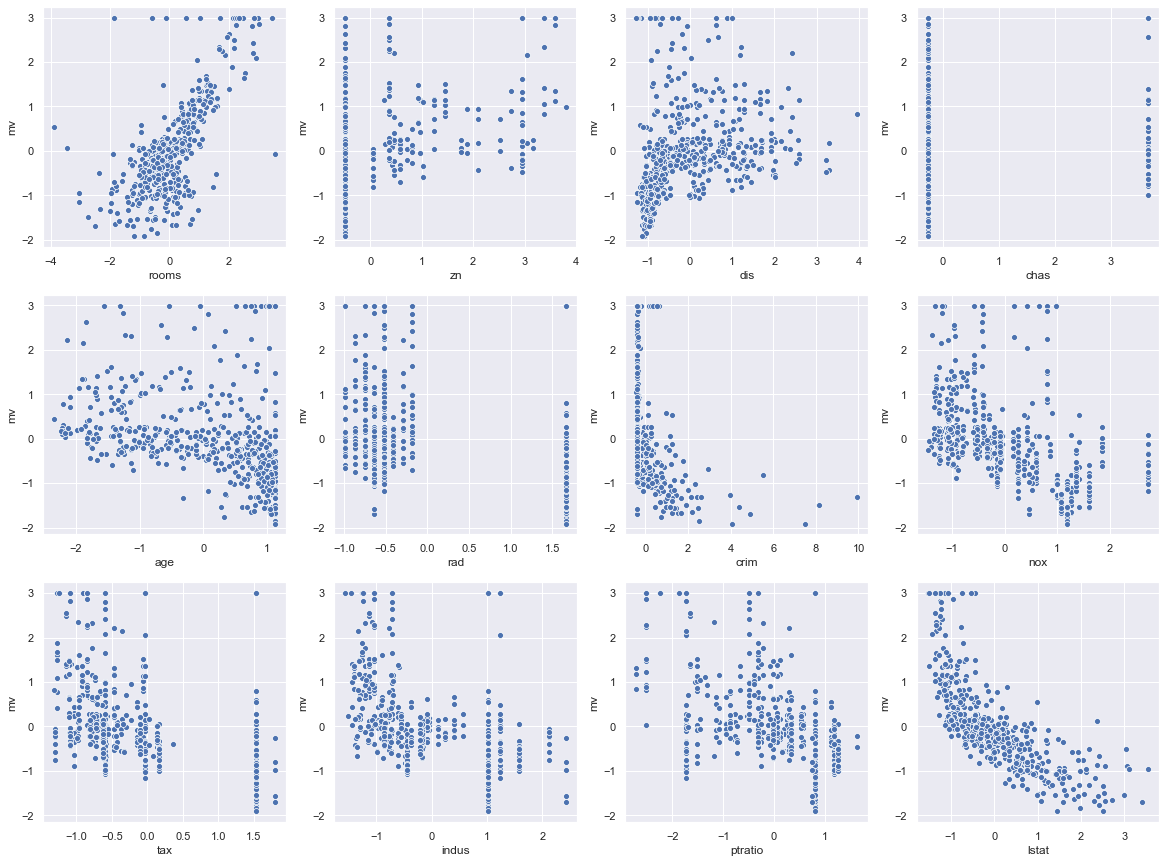

In [93]:
fig,axs=plt.subplots(nrows=3, ncols=4,figsize=(20,15))
g1=sns.relplot(x='rooms',y='mv',data=boston_scaled,ax=axs[0,0])
g2=sns.relplot(x='zn',y='mv',data=boston_scaled,ax=axs[0,1])
g3=sns.relplot(x='dis',y='mv',data=boston_scaled,ax=axs[0,2])
g4=sns.relplot(x='chas',y='mv',data=boston_scaled,ax=axs[0,3])
g5=sns.relplot(x='age',y='mv',data=boston_scaled,ax=axs[1,0])
g6=sns.relplot(x='rad',y='mv',data=boston_scaled,ax=axs[1,1])
g7=sns.relplot(x='crim',y='mv',data=boston_scaled,ax=axs[1,2])
g8=sns.relplot(x='nox',y='mv',data=boston_scaled,ax=axs[1,3])
g9=sns.relplot(x='tax',y='mv',data=boston_scaled,ax=axs[2,0])
g10=sns.relplot(x='indus',y='mv',data=boston_scaled,ax=axs[2,1])
g11=sns.relplot(x='ptratio',y='mv',data=boston_scaled,ax=axs[2,2])
g12=sns.relplot(x='lstat',y='mv',data=boston_scaled,ax=axs[2,3])
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)
plt.close(g4.fig)
plt.close(g5.fig)
plt.close(g6.fig)
plt.close(g7.fig)
plt.close(g8.fig)
plt.close(g9.fig)
plt.close(g10.fig)
plt.close(g11.fig)
plt.close(g12.fig)
plt.show()


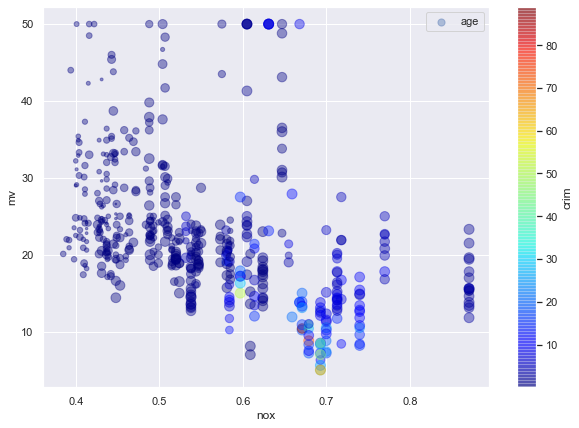

In [105]:
boston_prelim.plot(kind="scatter", x="nox", y="mv", alpha=0.4,
    s=boston_prelim["age"], label="age", figsize=(10,7),
    c="crim", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [96]:
boston_scaled.isnull().sum()

mv         0
crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
dtype: int64